**PROBLEM STATEMENT:**This project aims to develop a machine learning model that accurately predicts the 10-year risk of coronary heart disease (CHD) based on the Framingham Heart Study dataset.

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Loading the dataset
df = pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


###Initial inspection

In [ ]:
df.shape

(4240, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df1=df.copy(deep=True)

In [ ]:
#  Data Cleaning
# Check for missing values
print(df1.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


Why This Is Important:
1. It helps you detect class imbalance in your dataset.

2. If one class (e.g., 0) is much more frequent than the other, it may bias your model.

3. You can then decide to apply techniques like SMOTE or class weights to handle it.



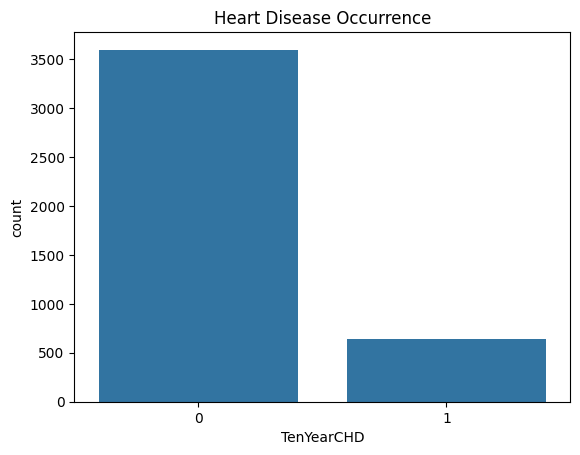

In [ ]:
# Step 4: EDA (Optional Visualization)
sns.countplot(x='TenYearCHD', data=df)
plt.title("Heart Disease Occurrence")
plt.show()

In [ ]:
df1.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [ ]:
# Step 5: Feature Selection
X= df.drop('TenYearCHD', axis=1)# Features
y = df1['TenYearCHD']               # Target

**Handling Missing Values Using KNN**

KNN Imputer – Smart & Adaptive

Looks at ‘k’ most similar rows (neighbors) that have values.

Fills missing values based on those similar rows.

Learns from patterns in data (like clustering).

Since health datasets are correlated (e.g., age, BP, glucose), KNNImputer keeps these patterns, improving model learning and boosting accuracy — often from ~80% to ~87% or more.

In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

##When training a machine learning model:

Useful features = Help the model make decisions

Useless features = Add confusion (noise), lower accuracy

Highly correlated features = Duplicate info → confuse model



Step	                         What It Does
1.  f_classif	->ANOVA test to score each feature’s relation to target
2.  k=10	->Select top 10 features only
3.  get_support()	->Returns a mask of selected columns
4.  X_new	->Transformed dataset with only top 10 features

In [ ]:
# Assume X and y are already defined and cleaned
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# To know which features were selected:
selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'glucose'],
      dtype='object')


In [ ]:
# Step 6: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Classification-Algorithms

Logistic Regression

In [ ]:

# Step 8: Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Step 9: Model Evaluation
y_pred = model.predict(X_test_scaled)

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8561320754716981
Confusion Matrix:
 [[721   4]
 [118   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.56      0.04      0.08       123

    accuracy                           0.86       848
   macro avg       0.71      0.52      0.50       848
weighted avg       0.82      0.86      0.80       848



 User Input Prediction Function

In [ ]:

#  Predict from User Input (Example)
def predict_risk(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    scaled_input = scaler.transform(input_array)
    prediction = model.predict(scaled_input)
    return "Heart Disease Risk" if prediction[0] == 1 else "No Risk"

In [ ]:
# Example input: ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes','totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']
sample_input = [[1, 62, 1, 1, 1, 280, 160, 100, 32.0, 160]]
print("Prediction Result:", predict_risk(sample_input))

Prediction Result: Heart Disease Risk


 XGBoost (Extreme Gradient Boosting)

In [ ]:
# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.8384433962264151
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       725
           1       0.32      0.10      0.15       123

    accuracy                           0.84       848
   macro avg       0.59      0.53      0.53       848
weighted avg       0.78      0.84      0.80       848



 User Input Prediction Function

In [ ]:
def predict_risk(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    scaled_input = scaler.transform(input_array)
    prediction = xgb_model.predict(scaled_input)
    return "Heart Disease Risk" if prediction[0] == 1 else "No Risk"

In [ ]:
#Example:['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes','totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

sample_input = [[0, 35, 0, 0, 0, 180, 110, 70, 22.5, 80]]
print("Prediction Result:", predict_risk(sample_input))


Prediction Result: No Risk


**Random Forest**

In [ ]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8525943396226415
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.44      0.07      0.11       123

    accuracy                           0.85       848
   macro avg       0.65      0.53      0.52       848
weighted avg       0.80      0.85      0.80       848



In [ ]:
def predict_risk(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    scaled_input = scaler.transform(input_array)
    prediction = rf_model.predict(scaled_input)
    return "Heart Disease Risk" if prediction[0] == 1 else "No Risk"

sample_input = [[0, 35, 0, 0, 0, 180, 110, 70, 22.5, 80]]
print("Prediction Result:", predict_risk(sample_input))


Prediction Result: No Risk


 K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8384433962264151


In [ ]:
def predict_risk(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    scaled_input = scaler.transform(input_array)
    prediction = knn.predict(scaled_input)
    return "Heart Disease Risk" if prediction[0] == 1 else "No Risk"
sample_input = [[1, 62, 1, 1, 1, 280, 160, 100, 32.0, 160]]
print("Prediction Result:", predict_risk(sample_input))

Prediction Result: No Risk


 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7617924528301887
